# sci-CAR

In [1]:
import importlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils


%matplotlib inline

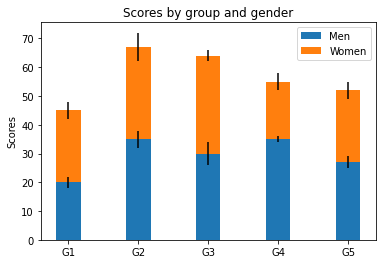

In [2]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

### RNA

In [3]:
path = 'data/Parallel-seq/sci-CAR/mouse_kidney/RNA/raw'
path_cell = 'GSM3271044_RNA_mouse_kidney_cell.txt.gz'
path_gene = 'GSM3271044_RNA_mouse_kidney_gene.txt.gz'
cells = pd.read_csv(f'{path}/{path_cell}', index_col='sample')
genes = pd.read_csv(f'{path}/{path_gene}', index_col='gene_id')
gene_counts = pd.read_csv(f'{path}/GSM3271044_RNA_mouse_kidney_gene_count.txt.gz', sep=' ', usecols=[0, 1, 2])

In [4]:
print(cells.shape)
cells.head()

(13893, 6)


,source,replicate,experiment,tsne_1,tsne_2,cell_name
sample,,,,,,
coRNA-RNA-plate1-001.TCGGCGTCGT,Mouse,Replicate 1,coassay,NaN,NaN,NaN
coRNA-RNA-plate1-001.CATGACTCAA,Mouse,Replicate 1,coassay,2.808426,-45.948924,Loop of Henle cells
coRNA-RNA-plate1-001.CGCCAGGCAT,Mouse,Replicate 1,coassay,-4.660380,-41.004499,Loop of Henle cells
coRNA-RNA-plate1-001.CTGGTTGGTT,Mouse,Replicate 1,coassay,NaN,NaN,NaN
coRNA-RNA-plate1-001.CCAGGCTCTT,Mouse,Replicate 2,coassay,10.309332,11.143745,Proximal tubule S1/S2 cells


In [5]:
print(genes.shape)
genes.head()

(49584, 2)


,gene_type,gene_short_name
gene_id,,
ENSMUSG00000102693.1,TEC,4933401J01Rik
ENSMUSG00000064842.1,snRNA,Gm26206
ENSMUSG00000051951.5,protein_coding,Xkr4
ENSMUSG00000102851.1,processed_pseudogene,Gm18956
ENSMUSG00000103377.1,TEC,Gm37180


In [6]:
gene_counts.drop(0, axis=0, inplace=True)
gene_counts.head()

,%%MatrixMarket,matrix,coordinate
1,258,1,1
2,564,1,1
3,1041,1,1
4,1092,1,1
5,1466,1,1


In [7]:
gene_counts.columns = ['gene', 'cell', 'count']
print(gene_counts.shape)
gene_counts.tail(10)

(7036187, 3)


,gene,cell,count
7036178,44074,13893,2
7036179,44133,13893,1
7036180,44420,13893,5
7036181,44908,13893,1
7036182,45357,13893,1
7036183,45437,13893,1
7036184,45991,13893,1
7036185,46464,13893,2
7036186,46915,13893,1
7036187,49552,13893,3


In [8]:
gene_counts['count'].describe()

count    7.036187e+06
mean     2.572595e+00
std      1.395969e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.771000e+03
Name: count, dtype: float64

In [9]:
gene_counts['count'].value_counts()

1       4380230
2       1381177
3        565932
4        260589
5        133695
         ...   
870           1
871           1
873           1
878           1
2771          1
Name: count, Length: 1021, dtype: int64

In [10]:
genes.gene_type.describe()

count              49584
unique                44
top       protein_coding
freq               21973
Name: gene_type, dtype: object

In [11]:
genes.gene_type.value_counts()

protein_coding                        21973
processed_pseudogene                   7289
lincRNA                                4255
TEC                                    2695
unprocessed_pseudogene                 2434
antisense                              2419
miRNA                                  2202
snoRNA                                 1508
snRNA                                  1383
processed_transcript                    753
misc_RNA                                564
rRNA                                    354
sense_intronic                          270
IG_V_gene                               218
transcribed_processed_pseudogene        197
transcribed_unprocessed_pseudogene      191
IG_V_pseudogene                         155
TR_V_gene                               144
pseudogene                               99
polymorphic_pseudogene                   77
TR_J_gene                                70
bidirectional_promoter_lncRNA            61
scaRNA                          

In [12]:
matrix = np.zeros((49584, 13893), np.int16)
for row in gene_counts.itertuples(index=False):
    matrix[row.gene - 1][row.cell - 1] = row.count

In [13]:
details = pd.DataFrame(matrix)
details.info(memory_usage='normal')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49584 entries, 0 to 49583
Columns: 13893 entries, 0 to 13892
dtypes: int16(13893)
memory usage: 1.3 GB


In [14]:
details.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13883,13884,13885,13886,13887,13888,13889,13890,13891,13892
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
gene_non_zero = (details != 0).sum(axis=1) / details.shape[1] * 100
gene_all_zero = gene_non_zero == 0

In [33]:
gene_non_zero.describe()

count    49584.000000
mean         1.021409
std          3.793854
min          0.000000
25%          0.000000
50%          0.014396
75%          0.309508
max         99.992802
dtype: float64

In [1]:
gene_all_zero.describe()

NameError: name 'gene_all_zero' is not defined

In [17]:
cell_non_zero = (details != 0).sum() / details.shape[0] * 100
cell_all_zero = cell_non_zero == 0

In [18]:
cell_non_zero.describe()

count    13893.000000
mean         1.021409
std          0.683656
min          0.022185
25%          0.475960
50%          0.869232
75%          1.441997
max          4.249355
dtype: float64

In [19]:
cell_all_zero.describe()

count     13893
unique        1
top       False
freq      13893
dtype: object

In [21]:
details.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13883,13884,13885,13886,13887,13888,13889,13890,13891,13892
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
detail1 = details.iloc[:20000].copy(deep=True)
detail1.dtypes

0        int16
1        int16
2        int16
3        int16
4        int16
         ...  
13888    int16
13889    int16
13890    int16
13891    int16
13892    int16
Length: 13893, dtype: object

In [23]:
detail2 = details.iloc[:500, :500].copy(deep=True)

In [24]:
detail3 = ((detail2 >= 2).astype(np.int8) + (detail2 >= 1).astype(np.int8))

In [25]:
detail4 = ((details >= 2).astype(np.int8) + (details >= 1).astype(np.int8))

In [26]:
detail4.describe()

,0,1,2,3,4,5,6,7,8,9,...,13883,13884,13885,13886,13887,13888,13889,13890,13891,13892
count,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,...,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000,49584.000000
mean,0.003086,0.010144,0.010346,0.007160,0.023072,0.008067,0.014440,0.005506,0.018978,0.025230,...,0.005203,0.006353,0.011778,0.017990,0.029021,0.007785,0.011879,0.007623,0.003025,0.003650
std,0.063595,0.116755,0.119131,0.100666,0.182289,0.104434,0.143263,0.083957,0.163357,0.192609,...,0.090785,0.100720,0.138501,0.170178,0.218594,0.111008,0.136512,0.111200,0.070372,0.073839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:>

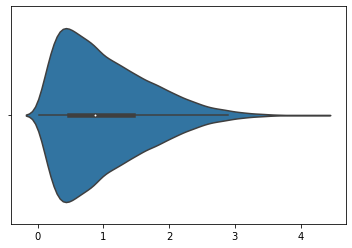

In [27]:
sns.violinplot(x=cell_non_zero)

<AxesSubplot:>

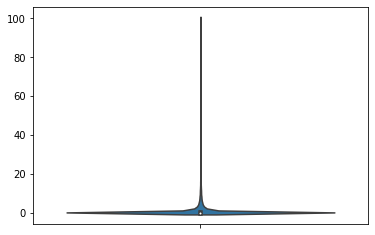

In [31]:
sns.violinplot(y=gene_non_zero)

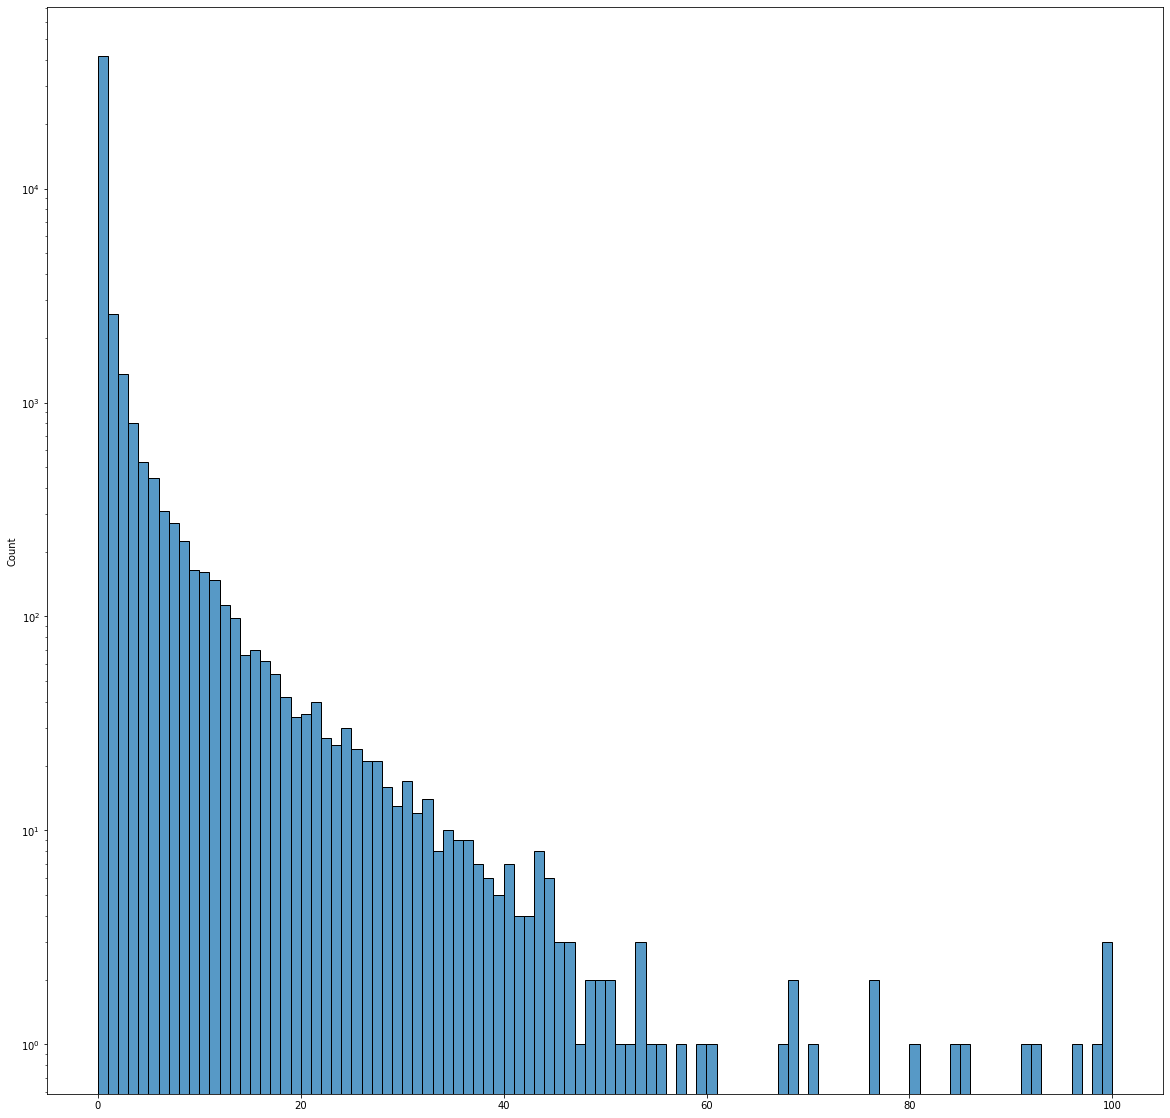

In [50]:
plt.figure(figsize=(20, 20))
g = sns.histplot(data=gene_non_zero, log_scale=(False, True), bins=100)

<Figure size 12000x6000 with 0 Axes>

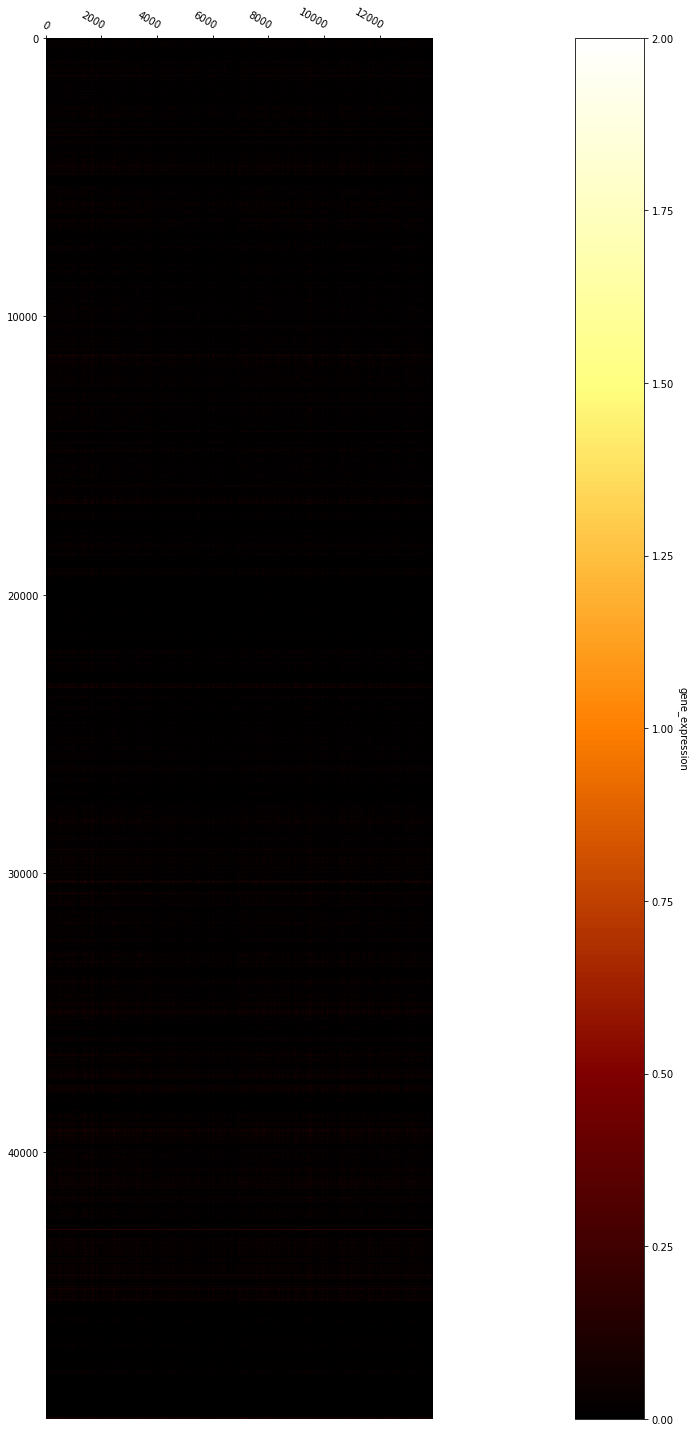

In [43]:
importlib.reload(utils)

plt.rcParams['figure.figsize'] = (40, 40)
plt.figure(dpi=600)
fig, ax = plt.subplots()
im, cbar = utils.heatmap(detail4, [], [], ax=ax,
                         cmap='afmhot', cbarlabel='gene_expression')
# texts = annotate_heatmap(im, valfmt='{x:.1f} t')

fig.tight_layout()
plt.savefig('heatmap_full.jpg', format='jpg')
# plt.show()

In [ ]:
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

plt.rcParams['figure.figsize'] = (20, 20)
plt.figure(dpi=300)
fig, ax = plt.subplots()
im, cbar = utils.heatmap(harvest, [], [], ax=ax,
                   cmap='BrBG', cbarlabel='gene_expression')
# texts = annotate_heatmap(im, valfmt='{x:.1f} t')
fig.tight_layout()
plt.show()

In [ ]:
detail3 = (details != 0).iloc[:400, :400]

In [ ]:
sns.heatmap(detail3, cmap="YlGnBu", xticklabels=20, yticklabels=20)

In [44]:
details.iloc[:20000].dtypes

0        int16
1        int16
2        int16
3        int16
4        int16
         ...  
13888    int16
13889    int16
13890    int16
13891    int16
13892    int16
Length: 13893, dtype: object

In [28]:
details.max().max()

2771

In [ ]:
details.loc[details[1234]>1, 1234].plot(kind='hist', bins=29)

<AxesSubplot:>

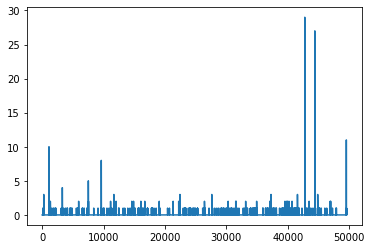

In [26]:
details[1234].plot(kind='line')

# scCAT-seq

In [8]:
import pandas as pd

path = 'data/Parallel-seq/scCAT-seq/embryo'
genes_CAT = pd.read_csv(f'{path}/RNA/counts.txt', sep='\t', index_col=0)
genes_CAT.head()

,scCAT_Morula_501,scCAT_Morula_502,scCAT_Morula_503,scCAT_Morula_507,scCAT_Morula_510,scCAT_Morula_518,scCAT_Morula_520,scCAT_Morula_521,scCAT_Morula_523,scCAT_Morula_525,...,scCAT_Blastocyst_545,scCAT_Blastocyst_546,scCAT_Blastocyst_554,scCAT_Blastocyst_555,scCAT_Blastocyst_556,scCAT_Blastocyst_557,scCAT_Blastocyst_558,scCAT_Blastocyst_561,scCAT_Blastocyst_563,scCAT_Blastocyst_564
ENSG00000000003,202,5,2,75,233,171,407,4,931,230,...,103,214,267,557,91,325,125,1036,328,355
ENSG00000000419,1504,3691,524,1135,901,1411,272,1515,1126,1171,...,702,559,1080,815,1303,499,141,746,892,405
ENSG00000000457,7,16,202,106,2,117,2,24,56,7,...,50,0,20,17,35,213,5,4,39,19
ENSG00000000460,1,1,1,48,0,259,22,84,114,63,...,228,1,99,115,361,38,0,1,237,56
ENSG00000000971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
genes_CAT.shape

(25155, 72)

In [13]:
counts_CAT = pd.read_csv(f'{path}/ATAC/counts.txt', sep='\t', index_col=0)
counts_CAT

,scCAT_Morula_501,scCAT_Morula_502,scCAT_Morula_503,scCAT_Morula_507,scCAT_Morula_510,scCAT_Morula_518,scCAT_Morula_520,scCAT_Morula_521,scCAT_Morula_523,scCAT_Morula_525,...,scCAT_Blastocyst_545,scCAT_Blastocyst_546,scCAT_Blastocyst_554,scCAT_Blastocyst_555,scCAT_Blastocyst_556,scCAT_Blastocyst_557,scCAT_Blastocyst_558,scCAT_Blastocyst_561,scCAT_Blastocyst_563,scCAT_Blastocyst_564
chr1_10712_11439,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,6,9
chr1_29302_29552,2,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,3,6
chr1_564352_570346,1028,1212,432,657,222,334,160,306,102,210,...,24,14,62,66,88,44,60,28,344,260
chr1_713736_714525,4,0,5,2,0,4,1,4,0,5,...,0,0,0,0,4,0,2,0,11,53
chr1_762481_763269,1,0,0,4,0,2,0,1,0,2,...,2,0,0,0,2,0,0,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr9_140916939_140917802,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,4,3,15
chr9_140917915_140918263,0,0,2,0,0,0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,2
chr9_140947803_140948321,0,0,0,0,2,0,0,3,2,0,...,0,0,2,0,4,0,0,0,4,4
chr9_140986539_140986932,0,0,0,0,1,0,2,0,0,0,...,0,0,0,0,0,0,0,2,2,10
